# Cat vs. Dog Classifier


The goal of this exercise is to create a classifier that predicts whether a given image contains a cat or a dog.
The dataset that has been used comes from https://www.superdatascience.com/pages/deep-learning.

In [1]:
import pdb
import numpy as np

import tensorflow as tf
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential, load_model
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, Conv2D, Activation
from keras.preprocessing import image

Using TensorFlow backend.


# Preparations of dataset

## Images Augmentation
The provided dataset is not big, in order to increase its size data augentation can be used.
It applies various transformation to the images so the number of them and their diversity increases.

In [2]:
train_datagen = image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = image.ImageDataGenerator(rescale=1./255)

In [3]:
train_set_path = 'dataset/training_set'
test_set_path = 'dataset/test_set'

train_set = train_datagen.flow_from_directory(
        train_set_path,
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        test_set_path,
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# Neural Network

In order to fullfil this task, a neural network was used. It was built using **Keras** framework (
https://keras.io/ ).

Images may consist of humongous number of pixels - a FHD image (1920 x 1080) consists of over **2 millions pixels**. This number is way to big to be considered as an input to Artificial Neural Network.

Fortunately **Convolutional Neural Networks** are the **solution** for these kinds of challenges. Such network consists of two types of the layers that are located at the beginning of the network:
* convolution layers,
* pooling layers (either average or maximum).

They respectively: 
* try to capture (and enhance) the 'essence' of the images that is interesting for us - this is done by applying various filters to an image (for instance sharpening ones),
* decrease the dimensionality of the data - for instance by replacing each 2x2 square of an image by mean of these values.

## Model
The model that was used to perform a task consisted of the following layers:
1. Convolution
2. MaxPooling

3. Convolution
4. MaxPooling

5. Convolution
6. MaxPooling   

7. Flatten
8. Dense (128 nodes)

9. Dropout (50%) - for the sake of regularization
10. Output (1 node)


Since it is a binary classification problem `binary_crossentropy` loss function was used, the optimizer was `adam`.

In [4]:
def create_model(num_classes=2):

    model = Sequential()

    model.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


model = create_model()

W0705 14:14:05.507570 140551652645760 deprecation_wrapper.py:119] From /home/pietrek/ML/CNN/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0705 14:14:05.523517 140551652645760 deprecation_wrapper.py:119] From /home/pietrek/ML/CNN/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0705 14:14:05.526270 140551652645760 deprecation_wrapper.py:119] From /home/pietrek/ML/CNN/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0705 14:14:05.543729 140551652645760 deprecation_wrapper.py:119] From /home/pietrek/ML/CNN/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d inste

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       36992     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
__________

### Keras Callbacks
Since training of the neural network takes a really long time, it is a good idea to save the progress of this process.   
Fortunately Keras has an adequate feature - callbacks. This requires only creating of the callback object that will contain an adequate method - in this case `on_epoch_end` due to the fact, that the progress will be saved each time an epoch ends.

In [6]:
class ModelSaver(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        self.model.save(f'model_{epoch}.hd5')

### Train the network...

In [8]:
batch_size = 32
validation_samples = 2000
train_samples = 8000

history = model.fit_generator(
        train_set,
        steps_per_epoch=train_samples,
        epochs=20,
        callbacks=[ModelSaver()],
        validation_data=test_set,
        validation_steps=validation_samples,
        workers=1,
        use_multiprocessing=False
)

Epoch 1/20
8000/8000 [==============================] - 1706s 213ms/step - loss: 0.3070 - acc: 0.8662 - val_loss: 0.3943 - val_acc: 0.8490
Epoch 2/20
8000/8000 [==============================] - 1790s 224ms/step - loss: 0.1618 - acc: 0.9347 - val_loss: 0.5746 - val_acc: 0.8620
Epoch 3/20
8000/8000 [==============================] - 1705s 213ms/step - loss: 0.1143 - acc: 0.9558 - val_loss: 0.6514 - val_acc: 0.8533
Epoch 4/20
8000/8000 [==============================] - 1705s 213ms/step - loss: 0.0919 - acc: 0.9657 - val_loss: 0.6465 - val_acc: 0.8553
Epoch 5/20
8000/8000 [==============================] - 1786s 223ms/step - loss: 0.0790 - acc: 0.9706 - val_loss: 0.6677 - val_acc: 0.8579
Epoch 6/20
8000/8000 [==============================] - 1671s 209ms/step - loss: 0.0683 - acc: 0.9751 - val_loss: 0.6535 - val_acc: 0.8624
Epoch 7/20
8000/8000 [==============================] - 1671s 209ms/step - loss: 0.0621 - acc: 0.9774 - val_loss: 0.6782 - val_acc: 0.8656
Epoch 8/20
8000/8000 [=====

### ... or load it

In [ ]:
model = load_model('model.h5')

## Visualise history 
`fit_generator` method that is used in network's training process returns a `History` object. It can be used to get an insight into the training process (in particular its efficiency) throughout the epochs.

The attributes of the object make visualization of this process pretty straightforward.

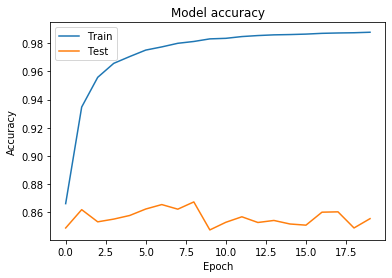

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

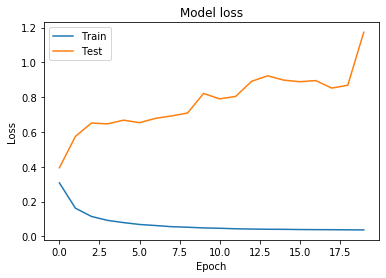

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

The visualisation and the values that were displayed in logs during the training process 

# Prediction on own images
From this point it is fairly easy to create a program that will perform a prediciton on an images provided by user. First step to do that is to save the model - this will allow to get the response immediately, instead of traininig the classifier each time.

## 1) Save the model
Saving the model using Keras is really straightforward - it requires running `save()` method on the model's object with model's path as its parameter.

In [13]:
model.save('model.h5')

## 2) Get and convert images

Section below contains a code that performs some manipulations on an image in order to be able to perform a prediction on it.   

The manipulations work as follows:   
1. Load an image from the disk and resize it properly - created network takes 64x64 images.
2. Convert it to an array.  
3. Add additional dimension - it is required since the neural network requires a tensor containing four dimensions.

In [14]:
image_path = 'dataset/single_prediction/cat.jpg'

test_image = image.load_img(image_path, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

## 3) Run the prediction
Once an image is loaded and converted to an adequate representation, it is possible to perform a prediction. In order to do that method `predict()` is run.
The output is an array containing predicted class - in this case `1` denotes class `dog`, `0` - `cat`.

In [20]:
result = model.predict(test_image)[0][0] # image of a cat
if result == 1:
    print('It is a dog!')
else: 
    print('It is a cat!')

It is a cat!


## 4) Standalone program
Feel free to check program `animal_predictor.py` that is located in the same directory as this notebook.  It is a simple command line application that contains the whole functionality of predicting the animal on the provided image.

### 4a) Instruction
To perform a prediction `animal_predictor.py` requires path to the image that is denoted as `--image {path_to_an_image}`.<br>
Path to the model is specified by default (`model.h5`), to use another path please specify argument `--model {path_to_model}`.

Example usage: `python animal_predictor.py --image 'dataset/dog_image.jpg' --model 'model.h5'`

# Conclusions
Created network had the accuracy of 98% on training and 85% on validation set. 
The **difference between accuracies** clearly indicates the presence of **overfitting**.

## Future work 
The current state of work may be good enough, but there still possible solutions that may increase the quality.

* **Even the fanciest algorithm is as good as the data that it uses** - in other words, the quality of the solution might be increased by using better dataset that:<br>
  * has more images, that cover the set of species better - for instance if no dog of Corgi breed is in datasets, the predicition on this breed might be invalid
  

* **Reduce overfitting** - there are some ways to prevent the neural network from overfitting, for instance: <br>
  * add / change dropout - this technique assigns to each and every unit of the network some given probability that denotes the chance of ignoring its value in computations,
  * early stopping - interrupt the process of training once the model starts to overfit (this can be achieved with Keras callbacks),
  * increase the quality of the dataset.


* **Find better parameters** - the presented network has been created using fixed parameters, there are methods such as Grid and Random Search that are used in order to find parameters. One could check the influence of different:<br>
  * batch sizes,
  * optimizer functions,
  * dropout,
  * number of layers, 
  * number of convolutions,
  * type of pooling (both kernel size and average / maximum types).